In [1]:
%matplotlib  inline  
import numpy as np 
import matplotlib.pyplot as plt  #codeblock to import needed modules 

In [2]:
def given_function(x):                  #f(x) takes a set of values 
    '''Takes values of x and inputs 
        those values into the quadradic.
        Returns value f(x) '''
    
    a = 1.01                            #a,b,c are declared constants 
    b = -3.04               
    c = 2.07 
    return a*x**2 + b*x + c             #Quadratic function 

In [3]:
def check_initial_values(f, x_min, x_max, tol): 
    '''Takes a function, and two guess values 
        for x_min and x_max, and a tolerance range value.
        Checks if the products of the y-values. 
        Returns check values.'''
    
    y_min = f(x_min)        #assigns y values by runing x values through 
    y_max = f(x_max)        #our 'given_function()'
    
  
    
    # check that x_min and x_max contain a zero crossing
    
    if (y_min*y_max >= 0.0):
        
        print(f"No zero crossing found in the range =  [{x_min}, {x_max}]")
        print('See that these x-values produced two positive y- values.')
        s = "f(%f) = %f, f(%f) = %f" % (x_min, y_min,x_max,y_max)
        print(s)
        print('We need a negative result.')
        
        return 0    
    
    # if x_min is a root, then return flag == 1 
    if (np.fabs(y_min)<tol): 
        return 1 
    
    #checks the ymin with function fabs() float absolute value 
    #if it is small enough return 1 
    
    # if x_max is a root, then return flag == 2
    if (np.fabs(y_max)<tol): 
        return 2 
    
    #checks the ymax, similar to prev. 
    #return 2 
    
    #min -> 1 
    #max -> 2
    
    # if we reach this point, the bracket is valid 
    # and we will return 3
    #closing this function 
    # 3 -> finished 
    
    return 3 

In [4]:
def bisection_root_finding(f, x_min_start, x_max_start, tol):
    '''Takes a function, two guess values for x 
        and a tolerance. Reassigns the values '''
    # this function uses bisection search to find a root 
    
    x_min = x_min_start      # minimum x in bracket
    x_max = x_max_start      # minimum x in bracket 
    x_mid = 0.0              # mid point 
    
    #midpoint is assigned 0.0  first then changed as it iterates 
    
    y_min = f(x_min)          #function value at x_min
    y_max = f(x_max)         #function value at x_max 
    y_mid = 0.0              #mid point 
    
    imax = 10_000            #set a maximum of iterations 
    i = 0                    #iteration counter 
    
    #check initail values 
    flag1 = check_initial_values(f, x_min, x_max, tol)
    if (flag1 == 0 ): 
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid', x_min,x_max )
        
    elif (flag1 == 1): 
        #lucky guess 
        return x_min
    elif (flag1 == 2 ): 
        return x_max
    
    #if we reach here, then we need to conduct the search
    
    #set a flag 
    
    flag2 = 1 
    
    #enter a while loop 
    
    while (flag2): 
        x_mid = 0.5*(x_min+x_max) #midpoint 
        y_mid = f(x_mid) 
        
        #check if x_mid is a root 
        if np.fabs(y_mid)< tol: 
            flag2 = 0 
            
            #this will beak the while loop and return the midpoint 
            #why: the flag is no logner 1 and the while loop only 
            #continues if the flag is 1 
            
            
        else: 
            #x_mid is not a root 
            
            #if the product of the function at the midpoint 
            #and at one of the end points is greater than 
            #zero, replace this end point 
            
            if f(x_min)*f(x_mid)> 0: 
                
                #replace x_min with x_mid
                
                x_min = x_mid
                
            else: 
                #replace x_max with x_mid
                
                x_max = x_mid 
                
        #print out the iteration 
        #print(x_min, f(x_min), x_max, f(x_max))
        
        
        #count the iteration 
        i += 1 
        
        #if we have exceeded the max number        
        #of iterations, exit 
        
        if i >= imax: 
            
            #the following is diagnositc info after exiting 
            
            print("Exceeded max number of iterations = ", i )
            s = "Min bracket f(%f) = %f" % (x_min, f(x_min))
            print(s)
            
            s = "Max bracket f(%f) = %f" % (x_max, f(x_max))
            print(s)
            
            s = "Mid bracket f(%f) = %f" % (x_mid, f(x_mid))
            print(s)
            raise StopIteration ('Stopping iterations after', i )
            
    print(f"\n\t - Total number of iterations:{i}") 
    
    #we are done 
    return x_mid

In [5]:
print("First set of guesses:")
x_min_guess1 = 0.5
x_max_guess1 = 1.3
tolerance = 1.0e-6

print(f"x-min: {x_min_guess1}\tf(x-min): {given_function(x_min_guess1)}")
print(f"x-max: {x_max_guess1}\tf(x-max): {given_function(x_max_guess1)}")

x_root1 = bisection_root_finding(given_function, x_min_guess1, x_max_guess1, tolerance)
y_root1 = given_function(x_root1)

s = '\nRoot found with: y(%f) = %f' % (x_root1,y_root1)
print(s)

print("\n\nSecond set of guesses:")
x_min_guess2 = 1.7
x_max_guess2 = 2.5
tolerance = 1.0e-6

print(f"x-min: {x_min_guess2}\tf(x-min): {given_function(x_min_guess2)}")
print(f"x-max: {x_max_guess2}\tf(x-max): {given_function(x_max_guess2)}")

x_root2 = bisection_root_finding(given_function, x_min_guess2, x_max_guess2, tolerance)
y_root2 = given_function(x_root2)

s = '\nRoot found with: y(%f) = %f' % (x_root2,y_root2)
print(s)

First set of guesses:
x-min: 0.5	f(x-min): 0.8024999999999998
x-max: 1.3	f(x-max): -0.17510000000000048

	 - Total number of iterations:14

Root found with: y(1.040869) = 0.000000


Second set of guesses:
x-min: 1.7	f(x-min): -0.17910000000000048
x-max: 2.5	f(x-max): 0.7825000000000002

	 - Total number of iterations:16

Root found with: y(1.969031) = -0.000001


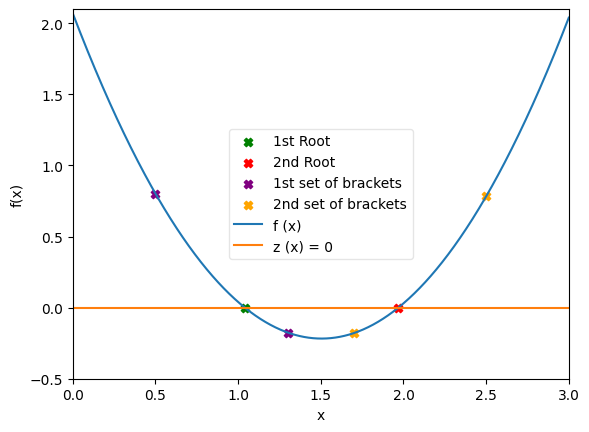

In [6]:
x = np.linspace(0,3, 1000)
y = 1.01*x**2 -3.04*x + 2.07 
z = 0*x 



plt.scatter(x_root1,y_root1, color = "green", label = '1st Root', marker = 'X')
plt.scatter(x_root2,y_root2, color = "red", label = '2nd Root', marker = 'X')


plt.scatter(x_min_guess1, given_function(x_min_guess1), color = "purple", marker = 'X', label = '1st set of brackets')
plt.scatter(x_max_guess1, given_function(x_max_guess1), color = "purple", marker = 'X')
plt.scatter(x_min_guess2, given_function(x_min_guess2), color = "orange", marker = 'X',label = '2nd set of brackets')
plt.scatter(x_max_guess2, given_function(x_max_guess2), color = "orange", marker = 'X')


       

#plt.yticks(np.arange(-0.5,2.1,1.3/3))
plt.xlim([0,3])                            #domain  
plt.ylim([-0.5,2.1])                       #range 


plt.plot(x,y, label = 'f (x)')            
plt.plot(x,z, label = 'z (x) = 0 ')
plt.xlabel('x')
plt.ylabel('f(x)')


plt.legend(loc=10,framealpha=.5)  

